# Web scraping

Automated gathering of data from web pages.

## Submitting requests

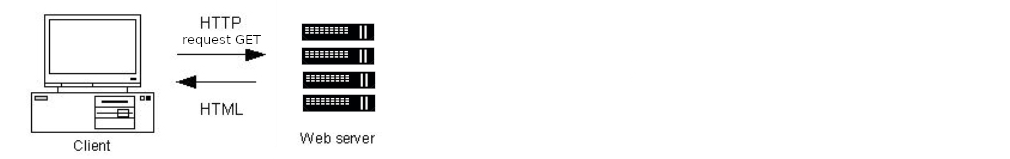

In [1]:
import requests

# pip install urllib

In [2]:
response = requests.get('http://neuefische.de')

**Available response attributes:**  
- response.**status_code** &rightarrow; was the request successful?
- response.url &rightarrow; the responding URL
- response.encoding &rightarrow; which text encoding is used?
- response.headers &rightarrow; the site's header
- response.**text** &rightarrow; the text which we are interested in

In [3]:
response.status_code

200

**The status code**
- 200 means that the request was valid and we got what we asked for.

- Everything with 400 means that we made a mistake or are not authorized &rightarrow; *Client error*
  - 404: Page not found

- Everything with 500 means that there is an error on the server side &rightarrow; *Server error*

**The text**

In [4]:
html_text = response.text

In [5]:
html_text

'<!DOCTYPE html><html lang="de"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1, interactive-widget=resizes-content"/><meta name="twitter:card" content="summary_large_image"/><meta name="twitter:site" content="@neuefische"/><meta property="og:type" content="website"/><meta property="og:locale" content="de"/><meta property="og:site_name" content="Neue Fische"/><meta name="format-detection" content="telephone=no"/><title>Coding Bootcamps | neue fische</title><meta name="robots" content="index,follow"/><meta name="description" content="Coding Bootcamps und IT-Schulungen auf Deutsch und Englisch in Hamburg, Berlin und live remote. "/><link rel="alternate" hrefLang="x-default" href="https://www.neuefische.de/en"/><link rel="alternate" hrefLang="de" href="https://www.neuefische.de"/><link rel="alternate" hrefLang="en" href="https://www.neuefische.de/en"/><meta property="og:title" content="Coding Bootcamps | neue fische"/><meta property="og:desc

In [6]:
type(html_text)

str

### Filling web forms

You sometimes want to get the html response after filling out a web form, e.g.  
https://datascience.stackexchange.com/  
when you search for e.g. "regex"

In [7]:
# https://datascience.stackexchange.com/search?q=regex
# can be requested by:
# html_text = requests.get("https://datascience.stackexchange.com/search?q=regex").text

# or more professional like this:

url = "https://datascience.stackexchange.com/"


form_values = {'q':'regex', 'pagesize':100}
response = requests.get(url, form_values)
# html_text = response.text

In [8]:
response.url

'https://datascience.stackexchange.com/?q=regex&pagesize=100'

In [9]:
html_text

'<!DOCTYPE html><html lang="de"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1, interactive-widget=resizes-content"/><meta name="twitter:card" content="summary_large_image"/><meta name="twitter:site" content="@neuefische"/><meta property="og:type" content="website"/><meta property="og:locale" content="de"/><meta property="og:site_name" content="Neue Fische"/><meta name="format-detection" content="telephone=no"/><title>Coding Bootcamps | neue fische</title><meta name="robots" content="index,follow"/><meta name="description" content="Coding Bootcamps und IT-Schulungen auf Deutsch und Englisch in Hamburg, Berlin und live remote. "/><link rel="alternate" hrefLang="x-default" href="https://www.neuefische.de/en"/><link rel="alternate" hrefLang="de" href="https://www.neuefische.de"/><link rel="alternate" hrefLang="en" href="https://www.neuefische.de/en"/><meta property="og:title" content="Coding Bootcamps | neue fische"/><meta property="og:desc

BTW: For more general requests use `requests.post(url, form_values)`. Look [here](https://www.geeksforgeeks.org/get-post-requests-using-python/) for differences between `.get()` and `.post()`.  
Here is the [documentation](https://requests.readthedocs.io/en/latest/) of the requests library (with many more possibilities).  
I you want to download a huge amount of web pages, you might like as well `wget` or `curl`.

### Beware

Some (commercial) web site owners frequently alter the html code and try to obsfucate the structure to complicate web scraping.

**Consider** that some web site owners have restrictions on web site crawling. You often can find these restrictions in robots.txt: (e.g. lyrics.com/robots.txt). Look [here](https://moz.com/learn/seo/robotstxt) for meanings.


If you want to scrape the same page several times, it is a good (faster) idea to set up a session first:  
`s = requests.Session()`  
You can then get content (several times) via  
`r = s.get('http://anywebpage.xy/')`

## HTML

When trying to find an information on a certain location of a web page, we need to have a overview of the site's structure. That's what *parsing* means. Web pages are usually written in html.  



html means *hypertext markup language*. It was defined for exchange of electronic texts.  
- *hypertext* because it contains more than just text, e.g. links (hyperlinks) to other electronic texts  
- *markup language*: distinct from the visible text, e.g. formatting or structuring information.

One of the most important key components of html are the so-called tags. They often come in pairs, opening tags (e.g.`<head>`) and closing ones (e.g. `</head>`), giving the text a structure.

```{html}
<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <div>
        <p>Hello world!</p>
    </div>
  </body>
</html>
```

### Some frequently used tags

- html tag: `<html> ... </html>`; root of the document
- head tag: `<head>document description</head>`
- body tag: `<body>`; contains text, images, tables...  
- title tag: `<title>`
- heading tag: `<h1>`, `<h2>`, ...; denotes different levels of headings  
- paragraph tag: `<p>`  
- link tag: `<a href="https://..."> Statements... </a>`; links to local or remote sites  
- unordered list tag: `<ul> <li>item 1</li> <li>item 2</li> </ul>`
- ordered list tag: `<ol>`; the rest like above
- image tag: `<img src="path_to_image.png">`; doesn't have a closing tag
- span tag: `<span>`; defines a section in a document
- div tag: `<div>`; section that is styled with CSS

Find all tags [here](https://www.w3schools.com/TAgs/default.asp).

Some tags might have so-called **attributes**, like a
- *class attribute* like `<li class="some_class_name"> ... </li>` or an  
- *id attribute* like `<h1 id="myHeader">My Header</h1>`. They are a unique id for an HTML element and simplify search a lot.


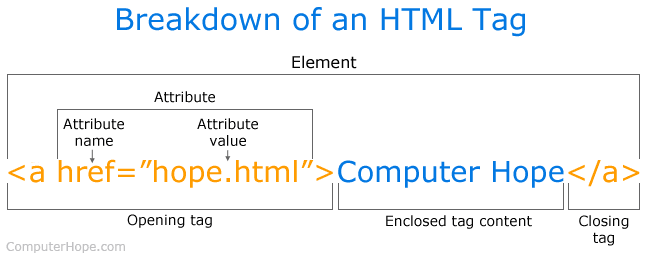

## BeautifulSoup

BeautifulSoup is a library which parses HTML and creates a tree structure of python objects that we can navigate through, extract information from, and edit. This makes life much easier than using regex only. 😀

### Installation

In [10]:
# using pip
#!pip install beautifulsoup4

### Most important concepts of beautifulsoup

#### `find()` and `find_all()`

- `.find_all()` finds matching elements, while `.find()` finds the first.  


- The argument of `.find_all()` and `.find()` can contain
  - the tagname like `.find("header")`
  - the attribute value like `.find(class_="...")` or `.find_all(id="...")`
  - the attribute name: Use `id=True` to find any tags containing the `id="..."` attribute
  - `string=` to seach for a string within an element: `find_all(string="...")`
  - **or any combination.**
  - If you get an error, consider [this](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#the-keyword-arguments) solution.

In [11]:
example_html_text = '''
<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <div>
        <p>Hello world!</p>
    </div>
  </body>
</html>
'''

In [12]:
from bs4 import BeautifulSoup
example_html_soup = BeautifulSoup(example_html_text, "html.parser")

In [13]:
example_html_soup.find("body").find("div").find("p").text

'Hello world!'

#### Alternative (shorter) notation

- Instead of `soup.find("tagname")` you can also use the `soup.tagname` notation, that means:
  - instead of chaining several `.find()`s you can use dots, e.g. `soup.body.h4.a...`

In [14]:
example_html_soup.body.div.p.text

'Hello world!'

#### Retrieving tag content / attribute value

- For retrieving the tag content of a certain element use the `.get_text()` attribute (or `string` or `text`),  
  - e.g. to retrieve "Web Development" in `<a href="/to/be/retrieved/">Web Development</a>` use `soup...a.get_text()`.


- For retrieving the attribute value use `soup.get("attribute_name")`.
  - e.g. to retrieve "/to/be/retrieved/" in `<a href="/to/be/retrieved/">Web Development</a>` use `soup.a.get("href")`
  - e.g. to retrieve "fb-customerchat" in `<div class="fb-customerchat">` use `soup.div.get("class_")`  
    **add an underscore** behind `class` (`class_`) to discriminate from the python keyword `class`.

In [15]:
example_html_soup.body.div.p.get_text()

'Hello world!'

#### Going up one level with `.parent`

- If you found your result and want to climb up the levels, `subsoup.parent` is your friend, leading you to `soup`.

In [16]:
subsoup = example_html_soup.body.div.p
subsoup.parent.parent.parent

<html>
<head>
<title>This is a title</title>
</head>
<body>
<div>
<p>Hello world!</p>
</div>
</body>
</html>

#### Further helpers

- beautifulsoup also accepts regular expressions to search for,  
  - e.g. `.find_all(re.compile("^b"))` to find all tags starting with a "b".
- There's much more to discover [here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

### Practical example

#### Import libraries, create the soup

In [17]:
# import libraries
import requests
from bs4 import BeautifulSoup
import re

In [18]:
# get html text
url = 'https://www.faz.net/aktuell/'
response = requests.get(url)
html_text = response.text

In [19]:
html_text

'<!DOCTYPE html><html  class="light-mode" lang="de" data-capo=""><head><meta charset="utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Aktuelle Nachrichten online - FAZ.NET</title>\n<link rel="preconnect" href="//ttmetrics.faz.net">\n<link rel="preconnect" href="//smetrics.faz.net">\n<script type="text/javascript" data-hid="2e4605b">\n          const isDark = window && \'matchMedia\' in window && typeof window.matchMedia === \'function\' && window.matchMedia(\'(prefers-color-scheme: dark)\').matches;\n          document.documentElement.classList.add(isDark ? \'dark-mode\' : \'light-mode\')\n        </script>\n<script src="https://snacks.faz.net/faz-snackswidget.min.js" type="module" async data-init="false"></script>\n<script src="https://assets.adobedtm.com/101b76c36d9a/299bb2761e13/launch-b62c4c37ed74.min.js" type="text/javascript" async="false" fetchpriority="high" id="adobe-launch-head"></script>\n<script src="https://atonato.de/fazscr" type="tex

In [20]:
# convert html to bs object
soup = BeautifulSoup(html_text, "html.parser")

Find differences in BeautifulSoup parsers [here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#differences-between-parsers).

In [21]:
type(soup)

bs4.BeautifulSoup

In [22]:
soup.text

"\n\nAktuelle Nachrichten online - FAZ.NET\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMenü schließenFrankfurter Allgemeine ZeitungSucheSucheStartseiteFAZ+Das Beste von FAZ+BundestagswahlPolitikÖffnenBundestagswahlInlandSicherheitskonferenzUSA unter TrumpUkraineAuslandPolitische BücherPRO EinspruchGeschichteBriefe an die HerausgeberWirtschaftÖffnenWas kostet die Welt?UnternehmenWohnenAuto & VerkehrKlima & NachhaltigkeitPRO DigitalwirtschaftPRO WeltwirtschaftArm und reichSchneller SchlauWirtschaftswissenFinanzenÖffnenPRO FinanzenFinanzmarktBörsen & MärkteMein DepotBörsenlexikonFeuilletonÖffnenDebattenKolumnenBücherMedienKinoPopBühne und KonzertKunst 

#### Inspect html code in the soup ...

In [23]:
# you can also print soup w/o prettify but without indentation
print(soup.prettify())

<!DOCTYPE html>
<html class="light-mode" data-capo="" lang="de">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Aktuelle Nachrichten online - FAZ.NET
  </title>
  <link href="//ttmetrics.faz.net" rel="preconnect"/>
  <link href="//smetrics.faz.net" rel="preconnect"/>
  <script data-hid="2e4605b" type="text/javascript">
   const isDark = window && 'matchMedia' in window && typeof window.matchMedia === 'function' && window.matchMedia('(prefers-color-scheme: dark)').matches;
          document.documentElement.classList.add(isDark ? 'dark-mode' : 'light-mode')
  </script>
  <script async="" data-init="false" src="https://snacks.faz.net/faz-snackswidget.min.js" type="module">
  </script>
  <script async="false" fetchpriority="high" id="adobe-launch-head" src="https://assets.adobedtm.com/101b76c36d9a/299bb2761e13/launch-b62c4c37ed74.min.js" type="text/javascript">
  </script>
  <script src="https://atonato.de/fazscr" typ

#### ... or in the browser

1. right click on an element on the web page: `inspect`
2. hover over either the code or the web content
3. look which html code and which content belongs together to identify the structure

#### Find a `clever way` to uniquely identify the lowest possible tag level containing all desired information

Now that you know which parts of the website you want to scrape, the most undefined job is done.  
Let's assume you want to scrape for text in a certain kind of tag.  

##### Shimmy through to the lowest possible tag level containing all desired information

```{python}

subsoup = soup...find(...).find(...)...
```

##### Hope that the desired tags have a parent that is unique

```{python}
subsoup = soup.find(<unique tag description>).parent
```

#### Find all occurences of the desired tag within this level and process the results

```{python}
for elm in subsoup.find_all(...):

    # find the elements one by one and process (e.g. print) them
    subelm = elm.find("subtag", class_="...", ...):
    print(subelm.text)
```

In [24]:
faz = soup.find_all(class_="teaser-object__title h3 text-grey")

In [25]:
headlines = []
for elm in faz:
    for line in elm.text.splitlines():
        headlines.append(line.strip())

In [26]:
headlines

['Das fordern die Parteien für die Bundeswehr',
 'Warum Menschen mit Migrationshintergrund AfD wählen',
 'Deutschland verliert im Kampf gegen Korruption den Anschluss',
 'Mehr als 180 mutmaßliche Mafiaangehörige auf Sizilien festgenommen',
 '„Wir vertreten mehrere Anleger, die mehr als eine Million Euro verloren haben“',
 'Die wahre Krise steht vielleicht noch bevor',
 '30 Minuten für die Flucht',
 'Was Anleger von Warren Buffett lernen können',
 'So lässt sich aus Trump Kapital schlagen',
 'Mehr als nur ein Konflikt – Die aggressive Zollpolitik des Donald Trump',
 'Der Fluch der alten Dinge',
 'Haben saufende Weinkenner noch eine Daseinsberechtigung?',
 'Für 13.163 Euro nach New York und zurück',
 'Oliver Blume ist der Mister 200 Prozent',
 '„Krafttraining ist ein Wundermittel für unsere Gesundheit“',
 'Merz reagiert mit Vorwürfen auf Scholz',
 'Scholz wirft Merz Unfähigkeit vor',
 'FDP-Chef Lindner: „Mit der FDP im Bundestag sind die Grünen aus der Regierung“',
 'Wie nach einer Ohrfe

**Pay attention**  
Web pages can consist of
1. html (the skeleton of a website)
2. css code (controls the appearance of a website)
3. javascript (expansion with dynamic functions)  

Since javascript runs locally in the browser, using beautiful soup for pages with dynamic content only retrieves the skeleton provided by the server. The desired content is often missing in such cases when using beautifulsoup.  

Retrieving data from web pages containing dynamic content is quite advanced but can be done e.g. with [selenium](https://www.selenium.dev/).

## Web scraping using an API

API (Application Programming Interface) is a concept used to describe – essentially – a piece of intermediary software (the interface) that facilitates communication between 2 other pieces of software (the applications).

Here, we mean **Web** APIs. 

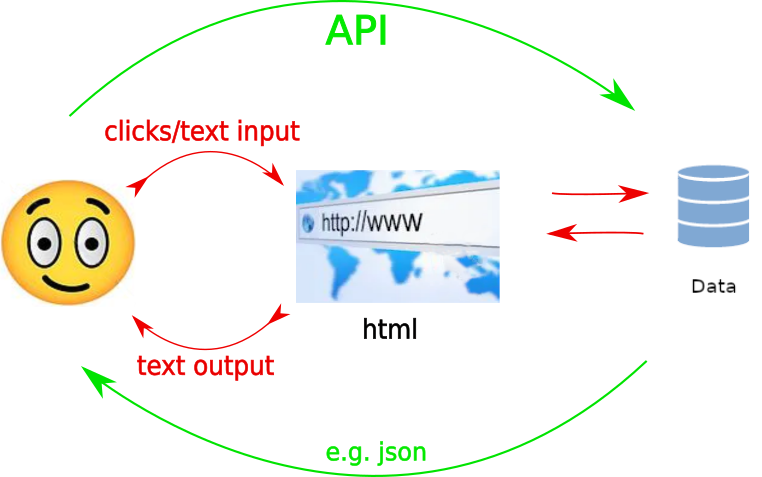

### What makes a web API better than scraping? 

- Interface is not meant for humans but for machines. This refers both, to  
    - requests (=> well defined way how to ask for information)
    - and to data delivery (=> provides data in a **more machine-readable format**, mostly json) 
- For larger data providers there are often  
    - helper libraries  
    - documentation and examples
    - clear terms and conditions about what is allowed
- From the point of view of the provider, APIs
    - create visibility (e.g. for a hotel operator whose vacant rooms are to be found by a meta search engine)
    - ...

### What is a REST API?

REST (**RE**presentational **S**tate **T**ransfer) means an [agreement](https://konghq.com/blog/learning-center/what-is-restful-api) about the protocol how the API works.  
It is the de facto standard for developing web APIs.  
REST APIs usually refer to http endpoints rather than to function calls.  

They repurpose the http protocol and allow for the CRUD operations (create, read, update delete).  

### Simple Example

In [27]:
"""
Berlin public transport API
"""

import requests

BASE_URL = 'https://v6.vbb.transport.rest'

# find a station
name = 'moritzplatz'
url = f"{BASE_URL}/locations?query={name}"
station_id = requests.get(url, timeout=1).json()[0]['id']  # https://stackoverflow.com/questions/70917108/python-requests-get-only-responds-if-adding-a-time-out


# look up departures
print(f'\nNext connections from U {name.capitalize()}:\n')

url = f'{BASE_URL}/stops/{station_id}/departures?duration={10}'

j = requests.get(url, timeout=1).json()

for e in j['departures']:
    print(e['plannedWhen'][11:-9], '  ', e['line']['name'], e['direction'])


Next connections from U Moritzplatz:

13:24    M29 Grunewald, Roseneck
13:28    U8 Hermannstraße
13:28    U8 Wittenau
13:30    M29 U Hermannplatz
13:33    U8 Hermannstraße
13:33    U8 Wittenau
13:34    M29 Grunewald, Roseneck


In [28]:
url

'https://v6.vbb.transport.rest/stops/900013101/departures?duration=10'

## Ressources

- [Beautiful Soup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)  
- [Video on retrieving job ads with BS](https://www.youtube.com/watch?v=XVv6mJpFOb0&t=1552s)  
- [How to submit forms (e.g. passwords)](https://realpython.com/python-web-scraping-practical-introduction/)
- [How to avoid getting blacklisted during web scraping](https://www.scrapehero.com/how-to-prevent-getting-blacklisted-while-scraping/)  
- Other web scrapers: [selenium](https://selenium-python.readthedocs.io/), [scrapy](https://scrapy.org/)  
- [A nice scraping tool](https://www.scraperapi.com/)  
- [Neuefische video on beautifulsoup](https://www.youtube.com/watch?v=HMSe8WTNmFg)
- Search APIs just be [consulting the internet](https://letmegooglethat.com/?q=API) (often with example code)
- List of web APIs [[1](https://apislist.com/), [2](https://pypi.org), [3](https://rapidapi.com/hub)]
- [Example](https://www.youtube.com/watch?v=BmHKb0kLGtA) how to scrape from Wikipedia  
- For development and testing also have a look at [postman](https://www.postman.com/)  